<a href="https://colab.research.google.com/github/Eyu-148/CS254ML-HW/blob/main/Eyu_Chen_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5


In this assignment you will use sklearn library to implement Decision Tree and Random Forests classifiers.
   
    - For part 0 and 1 you will use the Digits dataset from skLearn, 1797 images of 8x8 pixels each.
    
  For Part 1:
    - You need to split the data to train and test.
    - After that, you need to create DecisionTreeClassifier from sklearn, train on the training and test on the testing split. 
    - After that, you need to investigate the effect of having smaller number of features on the Decision Tree (DT) performance. You need to train and evaluate a DT classifier for each set of features. i.e. 1 feature, 2 features, 3 features, ... 64 features. 
    - After that, you need build RandomForest classifier and plot its performance trained from different number of estimators. 
  For Part 2:
    - You need to work on another digit dataset (MNIST), the images are 28x28 pixels already split to train and test (60000 samples for training and 10000 for testing).
    - You need to train a RandomForest classifier and test it on the testing data.
    - Then, you need to implement the RandomForest classifier by aggregating multiple DecisionTreeClassifiers. Compare the implemented aggregated version with the sklearn RandomForestClassifier. They should approximately match.


In [2]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

## Part 0: Prepare the data

#### Q1) (10 points) SKLearn's load_digits()
- Load the data
- You will be using this data for the entire assignment

In [3]:
digits = datasets.load_digits()

#### Q2) (10 points) Train test split
- We need to split our data into two groups in order to validate model performance and generalization ability 
- Use the sklearn train_test_split function to obtain training data and testing data
- Important: you must use a test size of 0.25 and a random_state of 0

Hint:
- size of trainig should be (1347, 64) y: (1347,), size of Testing should be : (450, 64) y: (450,).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1347, 64) (1347,) (450, 64) (450,)


## Part 1: Trees

#### Q3) (15 points) Build an decision tree classifier
- Create a DecisionTreeClassifier object
- Call the .fit() function to train your model
- Call the .score() function to assess model accuracy
- Print your accuracy.

In [5]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("accuracy: ", clf.score(X_test, y_test))

accuracy:  0.8577777777777778


#### Q4) (15 points) Search for max_features
- Create a for loop iterating though all possible values for the hyperparameter max_features
- Create a tree with max_features = i for each value within your loop
- Fit and score each tree
- Save these scores to some list structure

In [6]:
scores = []
for i in range(1, clf.max_features_ + 1):
  clf_maxFeature = DecisionTreeClassifier(max_features=i)
  clf_maxFeature.fit(X_train, y_train)
  #print(i, "-->", clf_maxFeature.score(X_test, y_test))
  scores.append(clf_maxFeature.score(X_test, y_test))

#### Q5) (15 points) Plot of scores
- Create a graph plotting y=scores from the above question (Use any visualization that you think makes sense)
- Briefly explain max_features in the context of your graph

Hint:
- You can use plt.plot() and plt.show() functions.


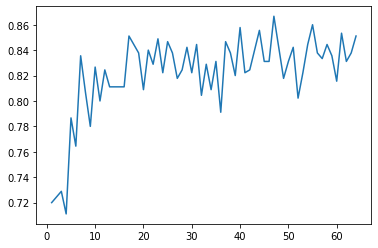

In [7]:
plt.plot(np.arange(1, clf.max_features_ + 1, dtype=int), scores)
plt.show()

As max_features increases, the accuaracy is converging to nearly the value we got by score(). 

## Part 2: Forests

#### Q6) (15 points) Build an random forest classification model
- Create a RandomForestClassifier object
- Call the .fit() function to train your model
- Call the .score() function to assess model accuracy
- Print your accuracy

In [8]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)
print("Accuracy: ", clf_rf.score(X_test, y_test))

Accuracy:  0.9755555555555555


#### Q7) (20 points) The n_estimators hyperparameter
- Write a for loop to iterate through many different sizes of trees (using the n_estimators hyperparameter)
- Graph and report your findings

Hint:
- you can choose up to 300 estimatores with step size of 10

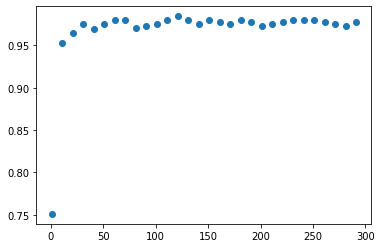

In [9]:
scores_rf = []
for i in range(1, 301, 10):
  clf_estimatores = RandomForestClassifier(n_estimators=i)
  clf_estimatores.fit(X_train, y_train)
  scores_rf.append(clf_estimatores.score(X_test, y_test))
plt.scatter(np.arange(1, 301, 10, dtype=int), scores_rf)
plt.show()

With increasing number of estimatores, the accuaracy is converging to nearly 0.97. 

## Graduate Student's Problem
(Or extra credit for undergraduates)

#### Q1) (10 points) MNIST baseline model
- Load the mnist dataset from the Keras/Tensorflow datasets library (or find the dataset online and import it with your method of choice) https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/
- Transform the shape of your input data from (len(data), 28, 28) to (len(data), 28 * 28) (This step may already be taken care of)
- Create a RandomForestClassifier, train on your training data, and obtain an accuracy score with your test data.

Hints:
- you can load load mnist dataset from tensorflow library by calling tf.keras.datasets.mnist.load_data(), where tf is the mported tensorflow.
- use reshape function to reshape your data. the data should diminsions after reshape should look like:
    - (60000, 784) for training 
    - (10000, 784) for testing
    

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)
clf_rf2 = RandomForestClassifier().fit(x_train, y_train)
print("Accuracy: ", clf_rf2.score(x_test, y_test))
print(x_test.shape, x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
Accuracy:  0.9691
(10000, 784) (60000, 784)


#### Q2) (10 points) Create a "Forest" of DecisionTreeClassifiers
- Create a list of n DecisionTreeClassifier objects, where n is the same number of trees as your RandomForestClassifier above
- Loop through your forest and train all of your trees individually

Hints:
- In this version of customized Randomforst (esnemble of DecisionTrees), I am not asking to train from subset of training data (you can do it if you would like), I am asking to randomize from features by setting max_features to sqrt (recommended as you are doing classiciation).

In [12]:
print(clf_rf2.n_estimators)
forest = []
for n in range(clf_rf2.n_estimators + 1):
  forest.append(DecisionTreeClassifier(max_features="sqrt"))
for tree in forest:
  tree.fit(x_train, y_train)

100


#### Q3) (15 points) Predict and score
- Get predictions from all trees for each data point
- How can we use these ensembles of predictions to create singular predictions for each data point?
- Obtain an accuracy and compare with your baseline model accuracy (should be similar, but not necessarily the same)

Hints:
- Use this command to loop through your trees implemented in Q2: ensemble_predictions = np.array([tree.predict(x_test) for tree in forest]).T where forest is the list of your classiferes created in Q2.
- you can use np.bincount with minlength=10 to aggregate your answers.
- you can use np.argmax to find the max index of your predictions after using np.bincount. 
- Accuracy is equal to number of predictions that match the labels in ytest divided by the total number of samples. You can use "==" operator to compare between two lists.

In [13]:
ensemble_predictions = np.array([tree.predict(x_test) for tree in forest])